<a href="https://colab.research.google.com/github/srinidhibv1403/1BM23CS339-BIS/blob/main/WEEK5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best solution found: [-1.64878281e-11 -1.51589875e-11  1.57175388e-11 -1.58027327e-11
  1.48005140e-11]
Best objective value: 1.217465978797637e-21


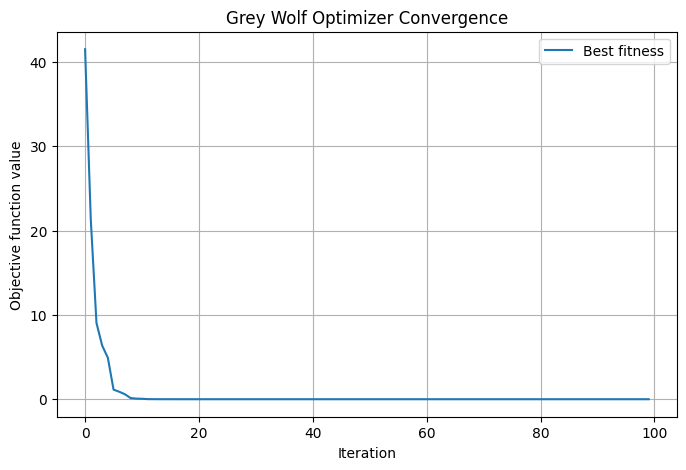

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function (Sphere function)
def objective_function(x):
    return np.sum(x**2)

class GreyWolfOptimizer:
    def __init__(self, obj_func, dim, n_wolves=20, max_iter=100, lb=-10, ub=10):
        self.obj_func = obj_func
        self.dim = dim
        self.n_wolves = n_wolves
        self.max_iter = max_iter
        self.lb = lb
        self.ub = ub

        self.positions = np.random.uniform(lb, ub, (n_wolves, dim))

        self.alpha_pos = np.zeros(dim)
        self.alpha_score = float('inf')

        self.beta_pos = np.zeros(dim)
        self.beta_score = float('inf')

        self.delta_pos = np.zeros(dim)
        self.delta_score = float('inf')

        self.convergence_curve = []

    def optimize(self):
        for iter in range(self.max_iter):
            for i in range(self.n_wolves):
                self.positions[i] = np.clip(self.positions[i], self.lb, self.ub)

                fitness = self.obj_func(self.positions[i])

                if fitness < self.alpha_score:
                    self.alpha_score = fitness
                    self.alpha_pos = self.positions[i].copy()
                elif fitness < self.beta_score:
                    self.beta_score = fitness
                    self.beta_pos = self.positions[i].copy()
                elif fitness < self.delta_score:
                    self.delta_score = fitness
                    self.delta_pos = self.positions[i].copy()

            a = 2 - iter * (2 / self.max_iter)  # linearly decreasing

            for i in range(self.n_wolves):
                for d in range(self.dim):
                    r1, r2 = np.random.rand(), np.random.rand()
                    A1 = 2 * a * r1 - a
                    C1 = 2 * r2
                    D_alpha = abs(C1 * self.alpha_pos[d] - self.positions[i, d])
                    X1 = self.alpha_pos[d] - A1 * D_alpha

                    r1, r2 = np.random.rand(), np.random.rand()
                    A2 = 2 * a * r1 - a
                    C2 = 2 * r2
                    D_beta = abs(C2 * self.beta_pos[d] - self.positions[i, d])
                    X2 = self.beta_pos[d] - A2 * D_beta

                    r1, r2 = np.random.rand(), np.random.rand()
                    A3 = 2 * a * r1 - a
                    C3 = 2 * r2
                    D_delta = abs(C3 * self.delta_pos[d] - self.positions[i, d])
                    X3 = self.delta_pos[d] - A3 * D_delta

                    self.positions[i, d] = (X1 + X2 + X3) / 3

            self.convergence_curve.append(self.alpha_score)

        return self.alpha_pos, self.alpha_score

# Run and plot convergence
if __name__ == "__main__":
    gwo = GreyWolfOptimizer(objective_function, dim=5, n_wolves=30, max_iter=100)
    best_pos, best_val = gwo.optimize()

    print("Best solution found:", best_pos)
    print("Best objective value:", best_val)

    plt.figure(figsize=(8,5))
    plt.plot(gwo.convergence_curve, label='Best fitness')
    plt.xlabel('Iteration')
    plt.ylabel('Objective function value')
    plt.title('Grey Wolf Optimizer Convergence')
    plt.legend()
    plt.grid(True)
    plt.show()
